[Reference](https://betterprogramming.pub/how-to-visualize-soccer-data-using-mplsoccer-in-python-39e2eddfb7d9)

In [2]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.7 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=3419243ef9537b1169563f8841a2fe0dd2f03dfe57b86e89ed685424ed6d50e8
  Stored in directory: /root/.cache/pip/wheels/ff/fc/ed/09e6cb7c61780f5462f1dfd1df7d1fabef0123ced961ac0738
Successfully built mplsoccer


# Load the data


In [3]:
import pandas as pd
competitions = pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json')
competitions[competitions.competition_name == 'Champions League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Medium

Mounted at /content/drive
/content/drive/MyDrive/Medium


In [6]:
import json
with open('Data/37.json') as f:
   data = json.load(f)
   for i in data:
      print(i['match_id'], i['home_team']['home_team_name'],     
      i['home_score'], "-", i['away_score'], i['away_team'] 
      ['away_team_name'])

2302764 AC Milan 3 - 3 Liverpool


In [7]:
with open('Data/2302764.json') as f:
   data = json.load(f)
   df = pd.json_normalize(data, sep="_")
   df.head()

In [8]:
first_half = df.loc[:1808, :]
second_half = df.loc[1809:3551, :]

# Shot Map


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f64f69cf3d0>)

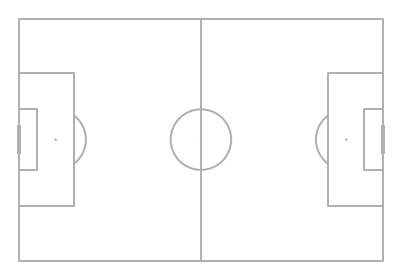

In [9]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='statsbomb')
pitch.draw()

In [10]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True)

In [11]:
# Retrieve rows that record shots
shots = first_half[first_half.type_name == 'Shot']
# Filter the data that record AC Milan
shots = shots[shots.team_name == 'AC Milan']
# Select the columns
shots = shots[['team_name', 'player_name', 'minute', 'second', 'location', 'shot_statsbomb_xg', 'shot_outcome_name']]
# Because the location data is on list format (ex: [100, 80]), we extract the x and y coordinate using apply method.
shots['x'] = shots.location.apply(lambda x: x[0])
shots['y'] = shots.location.apply(lambda x: x[1])
shots = shots.drop('location', axis=1)
# Divide the dataset based on the outcome
goals = shots[shots.shot_outcome_name == 'Goal']
shots = shots[shots.shot_outcome_name != 'Goal']
shots.head()

,team_name,player_name,minute,second,shot_statsbomb_xg,shot_outcome_name,x,y
333,AC Milan,Ivan Gennaro Gattuso,9,34,0.011739,Blocked,86.5,53.5
476,AC Milan,Hernán Jorge Crespo,13,36,0.025281,Blocked,114.9,50.2
481,AC Milan,Jaap Stam,13,39,0.063993,Blocked,113.1,40.5
631,AC Milan,Ricardo Izecson dos Santos Leite,17,10,0.039138,Off T,104.5,48.5


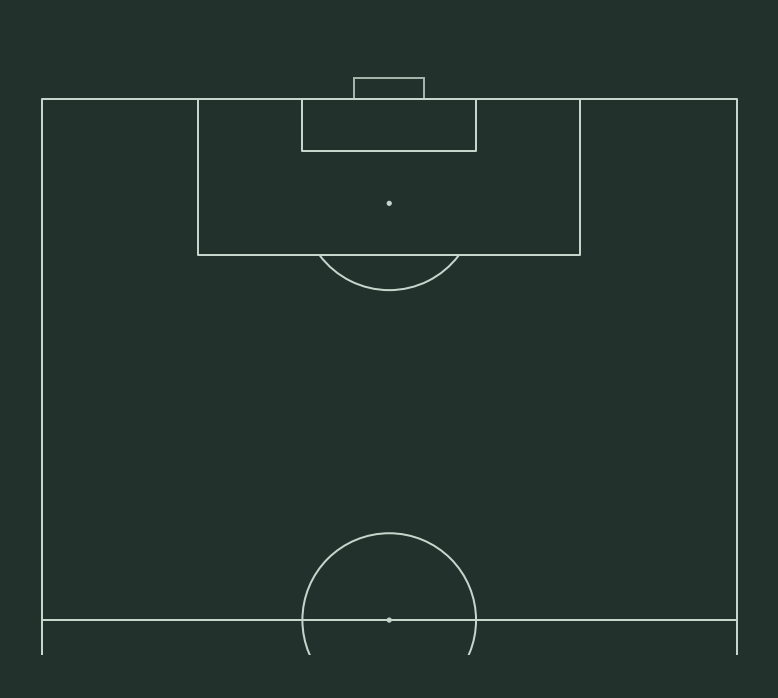

In [12]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")

In [13]:
scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 100, c='red', edgecolors='black', marker='o', ax=axs['pitch'])
scatter_goals = pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 100, c='red', edgecolors='black', marker='*', ax=axs['pitch'])

In [18]:
import matplotlib.pyplot as plt

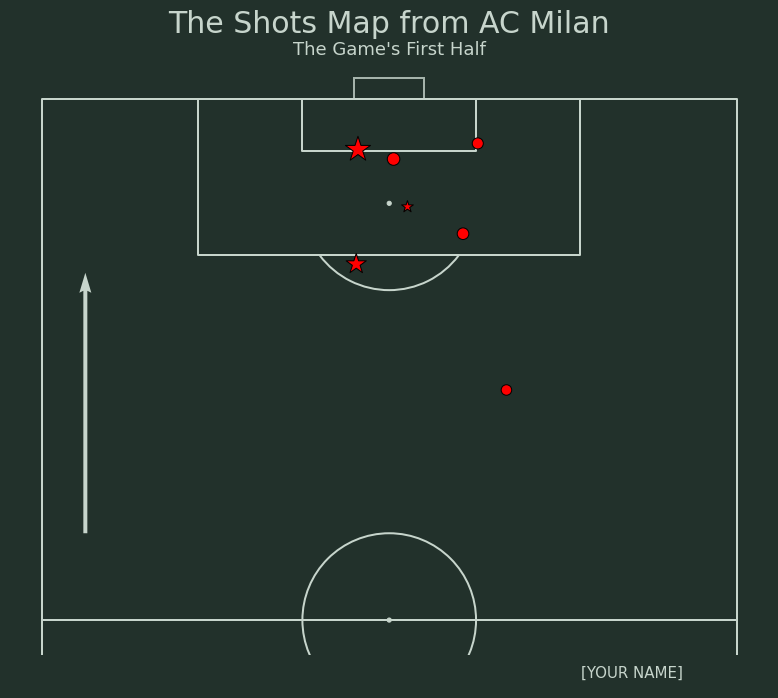

In [19]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("#22312b")
scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 100, c='red', edgecolors='black', marker='o', ax=axs['pitch'])
scatter_goals = pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 100, c='red', edgecolors='black', marker='*', ax=axs['pitch'])
pitch.arrows(70, 5, 100, 5, ax=axs['pitch'], color='#c7d5cc')
axs['endnote'].text(0.85, 0.5, '[YOUR NAME]', color='#c7d5cc', va='center', ha='center', fontsize=15)
axs['title'].text(0.5, 0.7, 'The Shots Map from AC Milan', color='#c7d5cc', va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc', va='center', ha='center', fontsize=18)
plt.show()

# Pressure Heat Map


In [16]:
pressure = first_half[df.type_name == 'Pressure']
pressure = pressure[['team_name', 'player_name', 'location']]
pressure = pressure[pressure.team_name == 'AC Milan']
pressure['x'] = pressure.location.apply(lambda x: x[0])
pressure['y'] = pressure.location.apply(lambda x: x[1])
pressure = pressure.drop('location', axis=1)
pressure.head()

,team_name,player_name,x,y
60,AC Milan,Andrea Pirlo,40.2,7.0
64,AC Milan,Ivan Gennaro Gattuso,37.1,11.1
70,AC Milan,Paolo Maldini,5.5,4.3
81,AC Milan,Andrea Pirlo,21.2,17.7
97,AC Milan,Andrea Pirlo,32.4,14.9


Text(0.5, 0.25, "The Game's First Half")

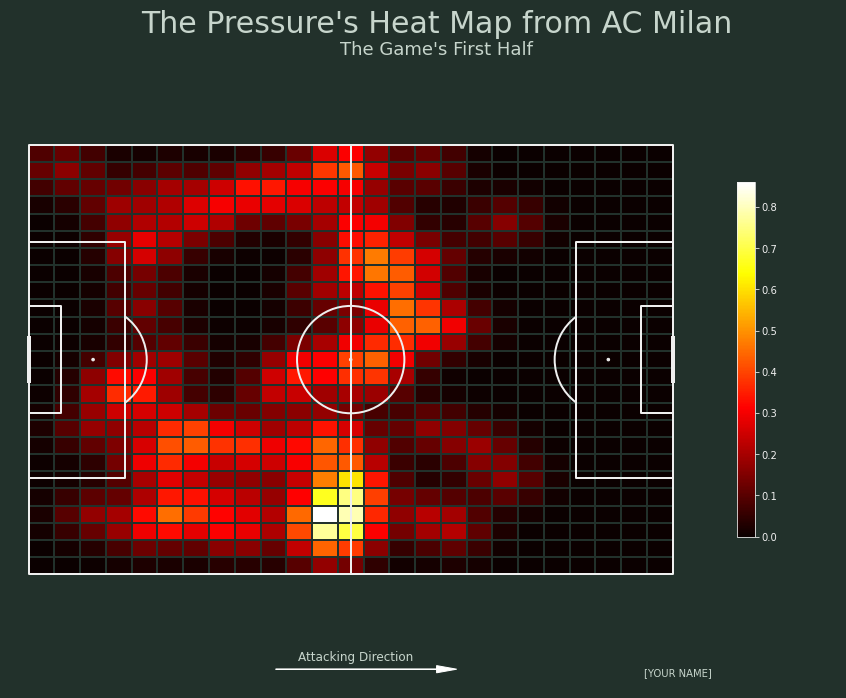

In [17]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(pressure.x, pressure.y, statistic='count', bins=(25, 25)) 
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')
cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
axs['endnote'].text(0.8, 0.5, '[YOUR NAME]', color='#c7d5cc', va='center', ha='center', fontsize=10)
axs['endnote'].text(0.4, 0.95, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.2, head_length=0.025, ec='w', fc='w')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)
axs['title'].text(0.5, 0.7, 'The Pressure\'s Heat Map from AC Milan', color='#c7d5cc', va='center', ha='center', fontsize=30)
axs['title'].text(0.5, 0.25, 'The Game\'s First Half', color='#c7d5cc', va='center', ha='center', fontsize=18)